##  Merge results of mRNA-protein correlation from different studies 

**Input:** Already processed mRNA-protein correlation from Part 1, 2 and 3.  

**Output:** Table S1

#### Import packages

In [1]:
import os
import numpy as np
import pandas as pd 

In [2]:
get_local_data_path = lambda folders, fname: os.path.normpath('../local_data/'+'/'.join(folders) +'/'+ fname)

In [3]:
file_older_tumour_studies = get_local_data_path(['processed', 'correlation_mRNA_protein'], 'older_tumour_studies.csv')
file_cptac_tumour_studies = get_local_data_path(['processed', 'correlation_mRNA_protein'], 'cptac_tumour_studies.csv')
file_non_tumour_studies = get_local_data_path(['processed', 'correlation_mRNA_protein'], 'non_tumour_studies.csv')
file_additional_info = get_local_data_path(['processed', 'correlation_mRNA_protein'], 'samples_info.csv')


file_merged_correlations = get_local_data_path(['results'], 'TableS1.xlsx')

#### Load data

In [4]:
correlations_merged = pd.concat([pd.read_csv(file, index_col=0) for file in [file_older_tumour_studies, 
                                                                             file_cptac_tumour_studies, 
                                                                             file_non_tumour_studies]],
                                axis=1, sort=True)
correlations_merged.index.name = 'Gene symbol'
correlations_merged[:2]

,CRC (2014),BrCa (2016),Ovarian,Colon,ccRCC,EC,LUAD,BrCa (2020),HNSCC,GBM,NCI60,CCLE,GTEx
Gene symbol,,,,,,,,,,,,,
A1BG,0.123133,-0.093805,-0.078889,NaN,0.035573,0.324974,-0.119663,0.077242,0.065872,-0.192863,NaN,NaN,0.154523
A1CF,NaN,NaN,NaN,0.673548,0.908613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188605


In [5]:
correlations_all = pd.DataFrame(correlations_merged.median(axis=0)).reset_index()
# correlations_all["Data"] = correlations_all.index.str.split().str[0]
correlations_all['Year'] = ['2014', '2016', '2016', '2019', '2019', '2020', '2020', '2020', '2021', '2021', '2019', 
                            '2020', '2020']
correlations_all.columns = ['Data', 'Computed',  'Year']
correlations_all['Reported'] = [0.23, 0.39, 0.45, 0.48, 0.43, 0.48, 0.53, 0.41, 0.52, np.nan, np.nan, 0.48, 0.46]
print("Median mRNA-protein correlation across all studies: ", round(correlations_all['Computed'].median(), 2))
correlations_all[:2]

Median mRNA-protein correlation across all studies:  0.43


,Data,Computed,Year,Reported
0,CRC (2014),0.220036,2014,0.23
1,BrCa (2016),0.417475,2016,0.39


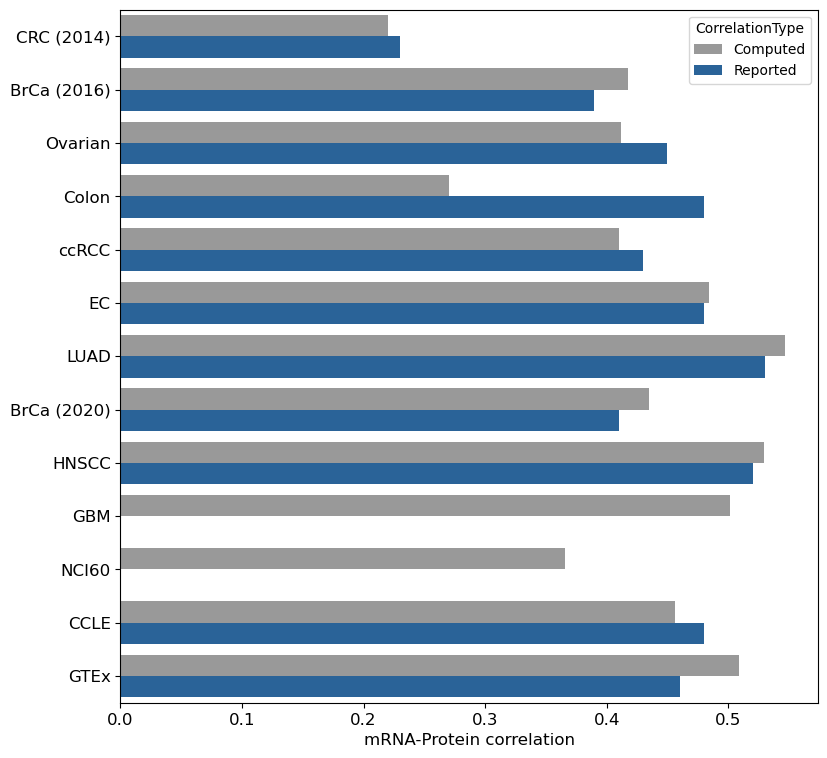

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt

correlations_all = pd.melt(correlations_all, id_vars=['Data', 'Year'], value_vars=['Computed', 'Reported'])
correlations_all.columns=['Data', 'Year', 'CorrelationType', 'Value']
with plt.rc_context({'axes.linewidth': 0.8, 'axes.spines.left': True}):
    figure, ax = plt.subplots(1, 1, figsize=(9, 9))
    ax = sns.barplot(y='Data', x='Value', data=correlations_all, hue='CorrelationType', palette=['#999999', '#1864aa'])
    ax.set_xlabel('mRNA-Protein correlation', fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel(None)
    plt.show()

<div class="alert alert-block alert-warning">
<b>Note:</b> 
<li>There is a huge difference in the computed and reported mRNA-protein correlation of CRC (2019). </li>
<li>EC computed and reported are almost the same</li>
<li>GBM and NCI60 has no reported mRNA-protein correlation</li>    
</div>

In [7]:
additional_info = pd.read_csv(file_additional_info)
additional_info

,Data,# Samples in Trancriptomic Data,# Samples in Proteomic Data,# Common Samples,# Common Proteins
0,CRC (2014),244,90,77,3238
1,BrCa (2016),817,77,59,7283
2,Ovarian,579,174,174,5841
3,Colon,106,96,95,4970
4,ccRCC,103,103,103,7609
5,EC,95,95,95,8998
6,LUAD,110,110,110,8507
7,BrCa (2020),122,122,122,8243
8,HNSCC,108,110,108,8583
9,GBM,99,99,99,9348


In [8]:
writer = pd.ExcelWriter(file_merged_correlations)
correlations_merged.to_excel(writer,'A. mRNA-protein correlation')
additional_info.to_excel(writer, 'B. Additional details', index=False)
writer.save()